# Importing required libraries

In [8]:
import pandas as pd
import numpy as np
import random as rd
from datetime import datetime
from dateutil import relativedelta
import matplotlib.pyplot as plt

# 1 - Plotting Cases per Judge in India

## State Codes with State Names

In [9]:
key = pd.read_csv('csv\\keys\\cases_court_key.csv')
df_key = (key.drop_duplicates('state_code'))[['state_code', 'state_name']]

## Judges in India (StateWise)

In [10]:
def Judges_perState():
    judges = pd.read_csv('csv\\judges_clean.csv')
    judges['judges_count'] = 1
    df = pd.DataFrame((judges.groupby(['state_code']).count())["judges_count"])
    
    df = df.merge(df_key, on="state_code", how='left')
    return df
df = Judges_perState()

## Cases in India (StateWise)

In [11]:
def Cases_perState(yr, p):
    loc = 'csv\\cases\\cases_' + str(yr) + '.csv'
    cases = pd.read_csv(loc, header=0, skiprows=lambda i: i > 0 and rd.random() > p)
    cases['count'] = 1
    df = pd.DataFrame((cases.groupby(['state_code']).count())["count"])
    
    df = df.merge(df_key, on="state_code", how='left')
    return df
df2 =Cases_perState(2018 ,0.01)

## Plotting Cases Vs Judges - StateWise

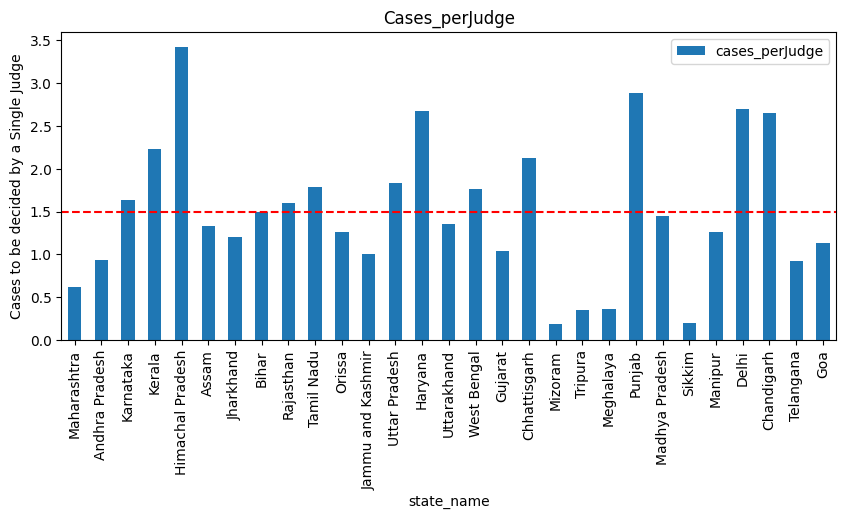

In [12]:
df3 = df.merge(df2, on="state_name", how='left')

for i in range(len(df3)):
    df3.loc[i, "cases_perJudge"] = (df3.loc[i, "count"]) / (df3.loc[i, "judges_count"])
    
threshold = df3["cases_perJudge"].mean()
df3.plot(x="state_name", y="cases_perJudge", kind="bar", figsize=(10, 4), legend=True)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.ylabel('Cases to be decided by a Single Judge')
plt.title("Cases_perJudge")
plt.show()

# 2 - Plotting Decision Rates of Case per Judge in India

## Function to Get Difference b/w 2 Dates in Form of Months

In [13]:
def fn(dt1, dt2):
    start_date = datetime.strptime(dt1, "%Y-%m-%d")
    end_date = datetime.strptime(dt2, "%Y-%m-%d")
    delta = relativedelta.relativedelta(end_date, start_date)

    # Actual Format in Which delta is Written
    # time=str(delta.years)+'Yrs '+str(delta.months)+'Months '+str(delta.days)+'Days'
    
    return delta.years*12+delta.months+delta.days/30

## Creating A DataFrame with - StateNames and Average time taken to Decide a Case

In [14]:
def DecisionRate_StateWise(yr, p):
    loc = 'csv\\cases\\cases_' + str(yr) + '.csv'
    cases = pd.read_csv(loc, header=0, skiprows=lambda i: i > 0 and rd.random() > p)
    df1 = cases[['state_code', 'date_of_filing', 'date_of_decision']].copy()
    
    # Removing Empty Enteries From the Column date_of_decision to see only those Cases which have been decided
    df = cases[cases['date_of_decision'].notna()]
    
    # Adding a Column (Time_Taken) and performing Mean StateWise
    # "Apply-Method" works for column by default, axis = 1 to iterate over rows
    df1['time_taken'] = df.apply(lambda r: fn(r.date_of_filing, r.date_of_decision), axis=1)
    df2 = pd.DataFrame(df1.groupby('state_code')['time_taken'].mean())
    
    # Adding State_Name Column alongSide the Average Time_Taken to plot them
    df2 = df2.merge(df_key, on="state_code", how='left')
    return df2
df2=DecisionRate_StateWise(2018, 0.01)

## Plotting DecisionRate - StateWise

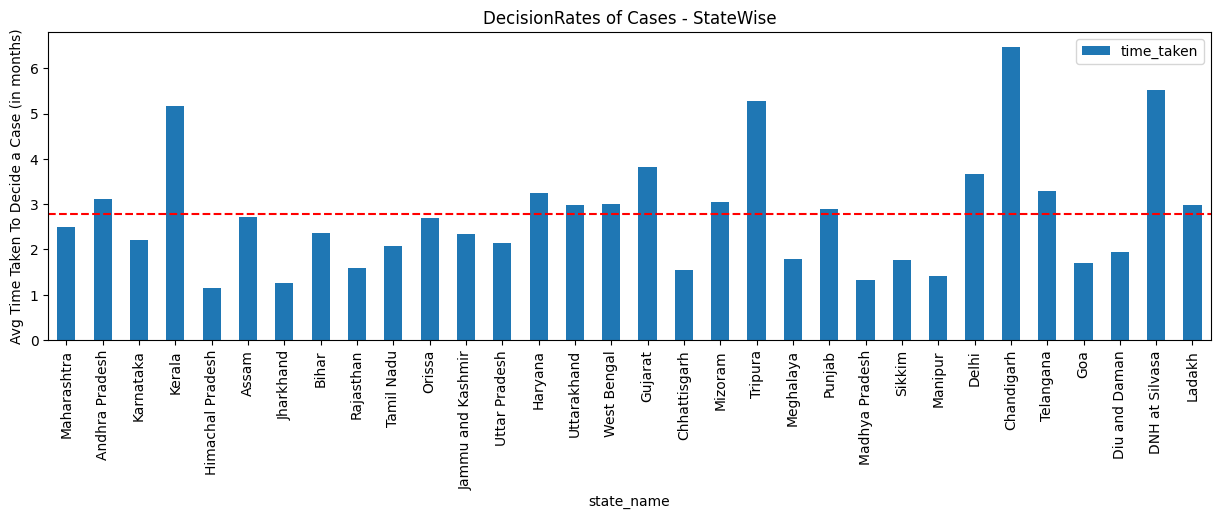

In [15]:
threshold=df2["time_taken"].mean()
df2.plot(x = "state_name", y = "time_taken", kind = "bar", figsize=(15, 4), legend=True)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title("DecisionRates of Cases - StateWise")
plt.ylabel('Avg Time Taken To Decide a Case (in months)')
plt.show()

# 3 - Plotting Gender Ratio of Judges $\Rightarrow$ $\frac{Male Judges}{Female Judges}$x 100  [StateWise]

## Removing all the unclear *female_judge* rows

In [16]:
df=pd.read_csv('csv\\judges_clean.csv')
df.drop(df[df['female_judge'] == '-9998 unclear'].index, inplace = True)

#Last 3 Rows not Present in judges_clean dataset
df1 = df_key[:-3]
df1=df1.reset_index(drop=True)

In [17]:
#Tocheck if Correct or Not
# df3 = pd.DataFrame(df.groupby(['state_code', 'female_judge'])['female_judge'].count()) 

## Creating A DataFrame with - StateNames and GenderRatio

In [18]:
#Separating female_judge gender Ratio with Different States
l=df.groupby(['state_code', 'female_judge'])['female_judge'].count().tolist()
p=[]

#Getting Gender Ratio
i=0
while (i < len(l)):
    p.append(l[i]/l[i+1]*100)
    i+=2

#Filling DataFrame With Gender Ratios
for i in range(0, 29):
        df1.loc[i, "count"] = p[i]

## Plotting GenderRatio_Judges- StateWise

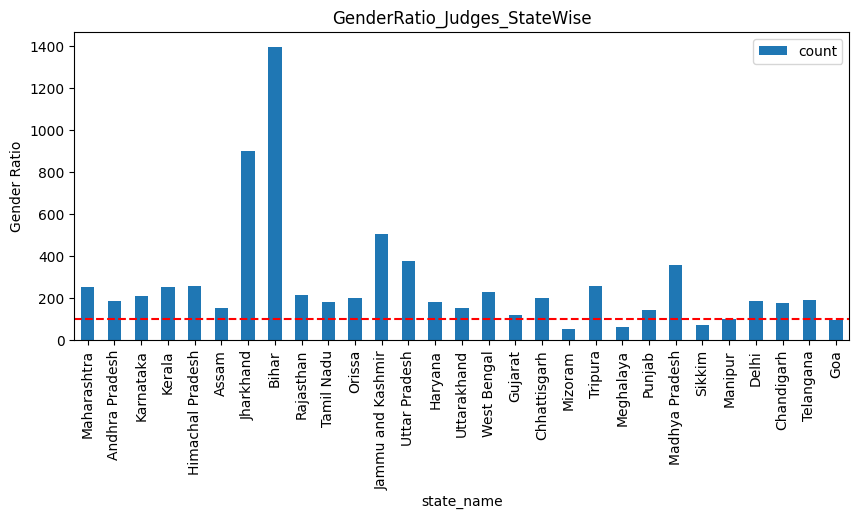

In [19]:
df1.plot(x = "state_name", y = "count", kind = "bar", figsize=(10, 4), legend=True)
plt.axhline(y=100, color='r', linestyle='--')
plt.title("GenderRatio_Judges_StateWise")
plt.ylabel('Gender Ratio')
plt.show()